In [273]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [274]:
train_df = pd.read_csv("train.csv")
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [275]:
train_labels = train_df['Survived']
train_labels

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [276]:
x_train = train_df.drop(['Ticket','Age','PassengerId','Name','Survived'],axis=1)
x_train

,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,1,0,7.2500,NaN,S
1,1,female,1,0,71.2833,C85,C
2,3,female,0,0,7.9250,NaN,S
3,1,female,1,0,53.1000,C123,S
4,3,male,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...
886,2,male,0,0,13.0000,NaN,S
887,1,female,0,0,30.0000,B42,S
888,3,female,1,2,23.4500,NaN,S
889,1,male,0,0,30.0000,C148,C


In [277]:
x_train = pd.concat([x_train, pd.get_dummies(x_train['Pclass'],prefix='Pclass')],axis=1)
x_train.drop(['Pclass'],inplace=True,axis=1)
x_train

,Sex,SibSp,Parch,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3
0,male,1,0,7.2500,NaN,S,0,0,1
1,female,1,0,71.2833,C85,C,1,0,0
2,female,0,0,7.9250,NaN,S,0,0,1
3,female,1,0,53.1000,C123,S,1,0,0
4,male,0,0,8.0500,NaN,S,0,0,1
...,...,...,...,...,...,...,...,...,...
886,male,0,0,13.0000,NaN,S,0,1,0
887,female,0,0,30.0000,B42,S,1,0,0
888,female,1,2,23.4500,NaN,S,0,0,1
889,male,0,0,30.0000,C148,C,1,0,0


In [278]:
x_train = pd.concat([x_train, pd.get_dummies(x_train['Embarked'],prefix='Embarked')],axis=1)
x_train.drop(['Embarked'],inplace=True,axis=1)
x_train

,Sex,SibSp,Parch,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,male,1,0,7.2500,NaN,0,0,1,0,0,1
1,female,1,0,71.2833,C85,1,0,0,1,0,0
2,female,0,0,7.9250,NaN,0,0,1,0,0,1
3,female,1,0,53.1000,C123,1,0,0,0,0,1
4,male,0,0,8.0500,NaN,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,male,0,0,13.0000,NaN,0,1,0,0,0,1
887,female,0,0,30.0000,B42,1,0,0,0,0,1
888,female,1,2,23.4500,NaN,0,0,1,0,0,1
889,male,0,0,30.0000,C148,1,0,0,1,0,0


In [279]:
x_train = pd.concat([x_train, pd.get_dummies(x_train['Sex'],prefix='Sex')],axis=1)
x_train.drop(['Sex'],inplace=True,axis=1)
x_train

,SibSp,Parch,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,7.2500,NaN,0,0,1,0,0,1,0,1
1,1,0,71.2833,C85,1,0,0,1,0,0,1,0
2,0,0,7.9250,NaN,0,0,1,0,0,1,1,0
3,1,0,53.1000,C123,1,0,0,0,0,1,1,0
4,0,0,8.0500,NaN,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,13.0000,NaN,0,1,0,0,0,1,0,1
887,0,0,30.0000,B42,1,0,0,0,0,1,1,0
888,1,2,23.4500,NaN,0,0,1,0,0,1,1,0
889,0,0,30.0000,C148,1,0,0,1,0,0,0,1


In [280]:
x_train['Cabin1'] = x_train['Cabin'].astype(str).str[0]
x_train

,SibSp,Parch,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Cabin1
0,1,0,7.2500,NaN,0,0,1,0,0,1,0,1,n
1,1,0,71.2833,C85,1,0,0,1,0,0,1,0,C
2,0,0,7.9250,NaN,0,0,1,0,0,1,1,0,n
3,1,0,53.1000,C123,1,0,0,0,0,1,1,0,C
4,0,0,8.0500,NaN,0,0,1,0,0,1,0,1,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,13.0000,NaN,0,1,0,0,0,1,0,1,n
887,0,0,30.0000,B42,1,0,0,0,0,1,1,0,B
888,1,2,23.4500,NaN,0,0,1,0,0,1,1,0,n
889,0,0,30.0000,C148,1,0,0,1,0,0,0,1,C


In [281]:
x_train['Cabin1'].unique()

array(['n', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [282]:
x_train['Cabin1'].value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin1, dtype: int64

In [283]:
x_train['Cabin'] = x_train['Cabin'].fillna(value='C')
x_train

,SibSp,Parch,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Cabin1
0,1,0,7.2500,C,0,0,1,0,0,1,0,1,n
1,1,0,71.2833,C85,1,0,0,1,0,0,1,0,C
2,0,0,7.9250,C,0,0,1,0,0,1,1,0,n
3,1,0,53.1000,C123,1,0,0,0,0,1,1,0,C
4,0,0,8.0500,C,0,0,1,0,0,1,0,1,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,13.0000,C,0,1,0,0,0,1,0,1,n
887,0,0,30.0000,B42,1,0,0,0,0,1,1,0,B
888,1,2,23.4500,C,0,0,1,0,0,1,1,0,n
889,0,0,30.0000,C148,1,0,0,1,0,0,0,1,C


In [284]:
x_train['Cabin1'] = x_train['Cabin'].astype(str).str[0]

In [285]:
x_train

,SibSp,Parch,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Cabin1
0,1,0,7.2500,C,0,0,1,0,0,1,0,1,C
1,1,0,71.2833,C85,1,0,0,1,0,0,1,0,C
2,0,0,7.9250,C,0,0,1,0,0,1,1,0,C
3,1,0,53.1000,C123,1,0,0,0,0,1,1,0,C
4,0,0,8.0500,C,0,0,1,0,0,1,0,1,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,13.0000,C,0,1,0,0,0,1,0,1,C
887,0,0,30.0000,B42,1,0,0,0,0,1,1,0,B
888,1,2,23.4500,C,0,0,1,0,0,1,1,0,C
889,0,0,30.0000,C148,1,0,0,1,0,0,0,1,C


In [286]:
x_train['Cabin1'].value_counts()

C    746
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin1, dtype: int64

In [287]:
x_train = pd.concat([x_train, pd.get_dummies(x_train['Cabin1'],prefix='Cabin1')],axis=1)
x_train.drop(['Cabin1'],inplace=True,axis=1)
x_train

,SibSp,Parch,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Cabin1_A,Cabin1_B,Cabin1_C,Cabin1_D,Cabin1_E,Cabin1_F,Cabin1_G,Cabin1_T
0,1,0,7.2500,C,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0
1,1,0,71.2833,C85,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
2,0,0,7.9250,C,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0
3,1,0,53.1000,C123,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0
4,0,0,8.0500,C,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,13.0000,C,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0
887,0,0,30.0000,B42,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0
888,1,2,23.4500,C,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0
889,0,0,30.0000,C148,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0


In [288]:
x_train.drop(['Cabin'],axis=1,inplace=True)
x_train

,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Cabin1_A,Cabin1_B,Cabin1_C,Cabin1_D,Cabin1_E,Cabin1_F,Cabin1_G,Cabin1_T
0,1,0,7.2500,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0
1,1,0,71.2833,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
2,0,0,7.9250,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0
3,1,0,53.1000,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0
4,0,0,8.0500,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,13.0000,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0
887,0,0,30.0000,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0
888,1,2,23.4500,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0
889,0,0,30.0000,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0


In [289]:
x_train.drop(['Cabin1_T'],axis=1,inplace=True)
x_train

,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Cabin1_A,Cabin1_B,Cabin1_C,Cabin1_D,Cabin1_E,Cabin1_F,Cabin1_G
0,1,0,7.2500,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,71.2833,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0
2,0,0,7.9250,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0
3,1,0,53.1000,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0
4,0,0,8.0500,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,13.0000,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0
887,0,0,30.0000,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0
888,1,2,23.4500,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0
889,0,0,30.0000,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0


In [290]:
model = tf.keras.Sequential([
    tf.keras.layers.Input((None,18,)),
    tf.keras.layers.Dense(64, activation ='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [291]:
model.compile(optimizer = 'Adam' , loss = tf.keras.losses.binary_crossentropy, metrics = ['accuracy'])

In [292]:
history = model.fit(x_train,train_labels,epochs=100,validation_split=0.2)

Epoch 1/100
23/23 [==============================] - 1s 9ms/step - loss: 0.9767 - accuracy: 0.4803 - val_loss: 0.6296 - val_accuracy: 0.7151
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 0.8597 - accuracy: 0.6306 - val_loss: 0.5594 - val_accuracy: 0.7430
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6366 - accuracy: 0.6938 - val_loss: 0.4926 - val_accuracy: 0.7654
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6387 - accuracy: 0.6840 - val_loss: 0.5322 - val_accuracy: 0.6816
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6518 - accuracy: 0.7008 - val_loss: 0.4872 - val_accuracy: 0.7654
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6011 - accuracy: 0.7430 - val_loss: 0.4505 - val_accuracy: 0.8156
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5557 - accuracy: 0.7626 - val_loss: 0.4364 - val_accuracy: 0.8268
Epoch 8/100
2

In [293]:
test_loss , test_acc = model.evaluate(x_train, train_labels, verbose=2)

28/28 - 0s - loss: 0.3979 - accuracy: 0.8361 - 44ms/epoch - 2ms/step


In [294]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

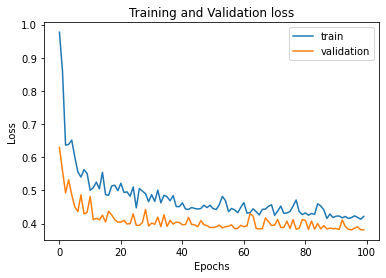

In [295]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train','validation']);


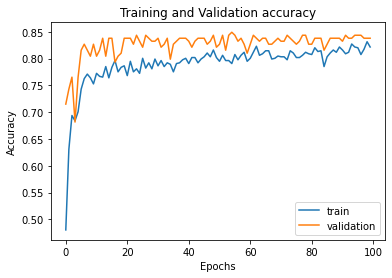

In [296]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','validation']);




In [297]:
test_data = pd.read_csv('test.csv')
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [298]:
x_test = test_data.drop(['Ticket','Age','PassengerId','Name'],axis=1)
x_test = pd.concat([x_test, pd.get_dummies(x_test['Pclass'],prefix='Pclass')],axis=1)
x_test.drop(['Pclass'],inplace=True,axis=1)
x_test = pd.concat([x_test, pd.get_dummies(x_test['Embarked'],prefix='Embarked')],axis=1)
x_test.drop(['Embarked'],inplace=True,axis=1)
x_test = pd.concat([x_test, pd.get_dummies(x_test['Sex'],prefix='Sex')],axis=1)
x_test.drop(['Sex'],inplace=True,axis=1)
x_test['Cabin'] = x_test['Cabin'].fillna(value='C')
x_test['Cabin1'] = x_test['Cabin'].astype(str).str[0]
x_test = pd.concat([x_test, pd.get_dummies(x_test['Cabin1'],prefix='Cabin1')],axis=1)
x_test.drop(['Cabin1'],inplace=True,axis=1)
x_test.drop(['Cabin'],inplace=True,axis=1)
x_test

,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Cabin1_A,Cabin1_B,Cabin1_C,Cabin1_D,Cabin1_E,Cabin1_F,Cabin1_G
0,0,0,7.8292,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0
1,1,0,7.0000,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0
2,0,0,9.6875,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0
3,0,0,8.6625,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0
4,1,1,12.2875,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,0,8.0500,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0
414,0,0,108.9000,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0
415,0,0,7.2500,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0
416,0,0,8.0500,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0


In [299]:
predictions = model.predict(x_test)
out = predictions.round().astype(int)
out[:5]

array([[0],
       [1],
       [0],
       [0],
       [0]])

In [300]:
out2 = np.round(predictions)
out2[:5]

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [301]:
y_true = pd.read_csv('gender_submission.csv')

In [302]:
y_true[:5]

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [303]:
y_final = np.array(y_true['Survived'])
y_final[:5]

array([0, 1, 0, 0, 1])

In [322]:
y_final = y_final.reshape((418,1))

In [323]:
from sklearn.metrics import confusion_matrix

matriz_conf = confusion_matrix(y_final, out )
matriz_conf

array([[  0,   0,   0],
       [  1, 255,  10],
       [  0,  36, 116]])

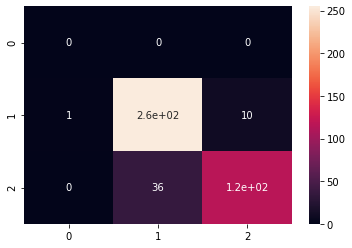

In [325]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_final, out ),annot=True);

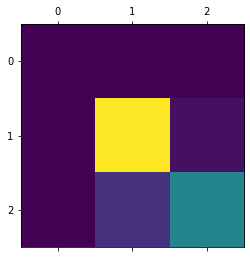

In [314]:
plt.matshow(confusion_matrix(y_final, out ));